In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import labellines
import seaborn as sns
import sklearn as sk
from IPython.display import clear_output
import collections
import torch
import torchvision
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, recall_score, precision_score, auc
from sklearn.metrics import make_scorer, mean_squared_error,precision_recall_fscore_support
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, LinearRegression, LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("heart.csv")

df['cp'] = pd.Categorical(df.cp)
df['slope'] = pd.Categorical(df.slope)
df['thal'] = pd.Categorical(df.thal)

# making cp, slope and thal into dummy variables because they are categorical datas
df = pd.get_dummies(df, drop_first=False)

X = df.drop("target",1)
y=df.target

xtrain,xtest,ytrain,ytest = train_test_split(X,y, test_size=0.3, random_state=1)

scl = StandardScaler()
xtrain = scl.fit_transform(xtrain)
xtest = scl.transform(xtest)


In [3]:
# CONSTANTS
rand_state = 0
test_size = 0.35

# Load in data and standardize
def live_plot(loss, train_acc, valid_acc=None, figsize=(7,5), title=''):
    clear_output(wait=True)
    fig, ax1 = plt.subplots(figsize=figsize)
    ax1.plot(loss, label='Training Loss', color='red')
    ax1.legend(loc='lower left')
    ax1.set_ylabel('Binary Cross Entropy Loss')
    ax2 = ax1.twinx()
    ax2.plot(train_acc, label='Training Accuracy', color='green')
    if valid_acc is not None:
        ax2.plot(valid_acc, label='Validation Accuracy', color='blue')
    ax2.legend(loc='lower right')
    ax2.set_ylabel('Accuracy (%)')
    ax2.set_xlabel('Epoch')
    plt.title(title)
    plt.show()



In [4]:

df = pd.read_csv("heart.csv")

df['cp'] = pd.Categorical(df.cp)
df['slope'] = pd.Categorical(df.slope)
df['thal'] = pd.Categorical(df.thal)

# making cp, slope and thal into dummy variables because they are categorical datas
df = pd.get_dummies(df, drop_first=False)

X = df.drop("target",1)
y= df.target.values

xtrain,xtest,ytrain,ytest = train_test_split(X,y, test_size=0.3, random_state=1)


Here we can see that fbs and age are the least significant predictor of heart disease.
ChestPain and Gender are the most significant predictor of heart disease; followed thalach, CA, and OLDPEAK.


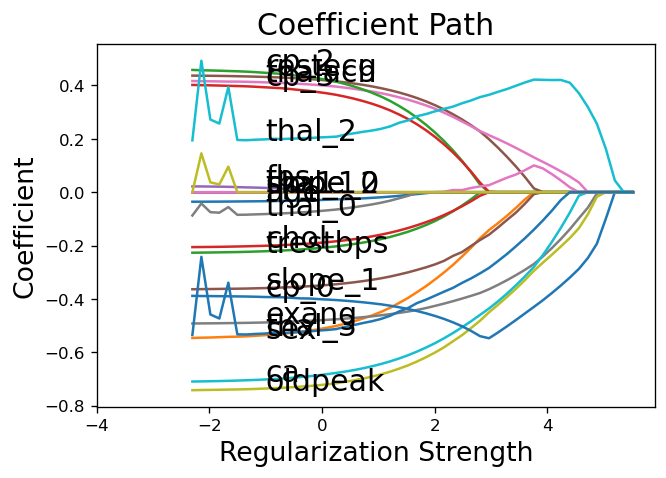

In [5]:
# Logisitic Regression ### Target variable is binary ###

# vary regularization strength from 0.1 and 250
reg_strength = np.exp(np.linspace(np.log(0.1),np.log(250),50))

coefs = np.zeros((reg_strength.size, xtrain.shape[1]))

for i,L in enumerate(reg_strength):
    las_mod = Pipeline([
    ('scale', StandardScaler()),
    ('log_reg', LogisticRegression(penalty = 'l1', 
                                               solver='liblinear', 
                                               max_iter=1000,
                                               C = 1.0/L))
    ])
    las_mod.fit(xtrain, ytrain)
    coefs[i] = las_mod.named_steps['log_reg'].coef_

fig, ax = plt.subplots(dpi = 120)
ax.plot(np.log(reg_strength), coefs)
ax.set_xlabel(r'Regularization Strength', fontsize = 16)
ax.set_ylabel(r'Coefficient', fontsize = 16)
ax.set_title('Coefficient Path', fontsize = 18)
ax.set_xlim(-4,None)

for i, name in enumerate(X.columns):
    
    ax.annotate(name, xy = (-1, coefs[0,i]), ha = 'left', fontsize = 18)


print("Here we can see that fbs and age are the least significant predictor of heart disease.")
print("ChestPain and Gender are the most significant predictor of heart disease; followed thalach, CA, and OLDPEAK.")

Best lambda: 3.3543294731317164


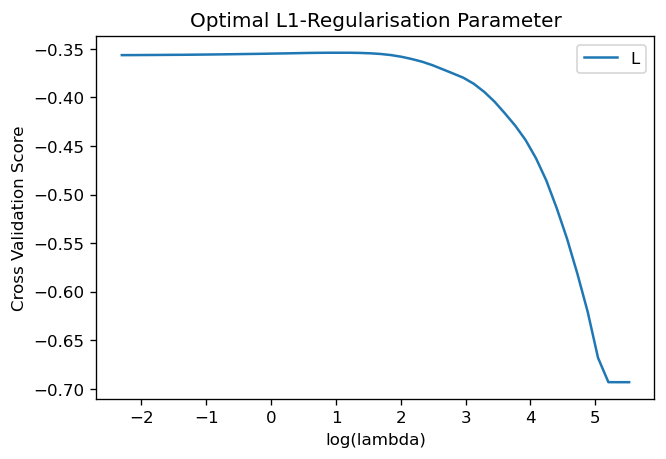

In [6]:
reg_strength = np.exp(np.linspace(np.log(0.1),np.log(250),50))

cvs = np.zeros(reg_strength.size)


for i, L in enumerate(reg_strength):
    las_mod = Pipeline([("scale", StandardScaler()),("logreg", LogisticRegression(penalty="l1",
                                                                                      solver="liblinear",
                                                                                      max_iter=10000,
                                                                                      C=1.0/L))])
    las_mod.fit(X,y)
    cvs[i] = cross_val_score(las_mod, xtrain,ytrain, cv=10, scoring="neg_log_loss").mean()
    
fig,ax =plt.subplots(dpi=120)


ax.plot(np.log(reg_strength), cvs)
ax.set_xlabel("log(lambda)")
ax.set_title("Optimal L1-Regularisation Parameter")
ax.set_ylabel("Cross Validation Score")
ax.legend("L1-Regularisation Parameter")
logmax = np.argmax(cvs)
best_lamb = reg_strength[logmax]
print("Best lambda:",best_lamb)

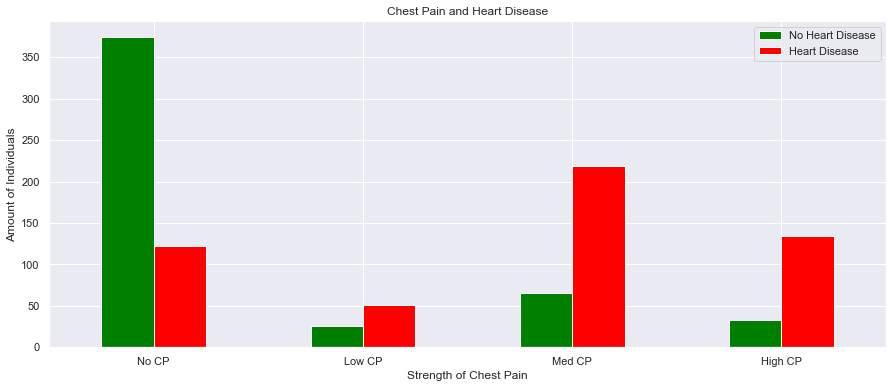

In [7]:
sns.set(rc={'figure.figsize':(20,12)})
a4_dims = (9, 7)
# cp
w = pd.crosstab([df.cp_1, df.cp_2, df.cp_3],df.target).plot(kind="bar",figsize=(15,6),color=['green','red'])
w.legend(["No Heart Disease", "Heart Disease"])
w.set_title("Chest Pain and Heart Disease")
w.set_xlabel("Strength of Chest Pain")
w.set_ylabel("Amount of Individuals")
plt.xticks(np.arange(4), ("No CP", "Low CP", "Med CP", "High CP"))
plt.xticks(rotation=0)

plt.savefig("CP_Correlation_bar_char")

404
124
0.7651515151515151


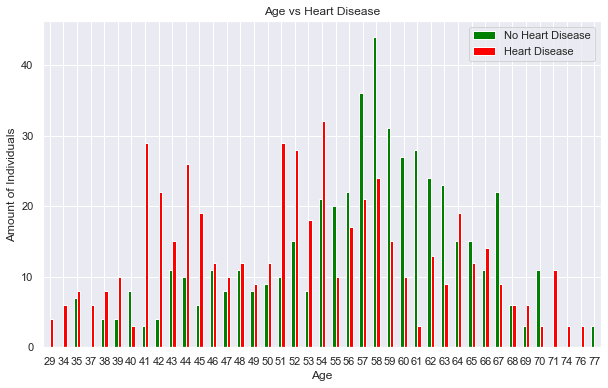

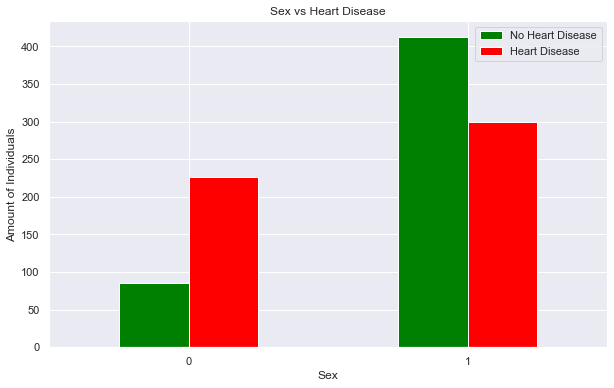

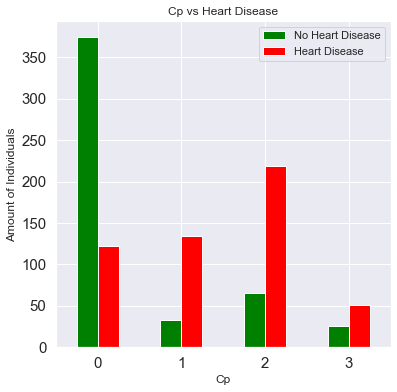

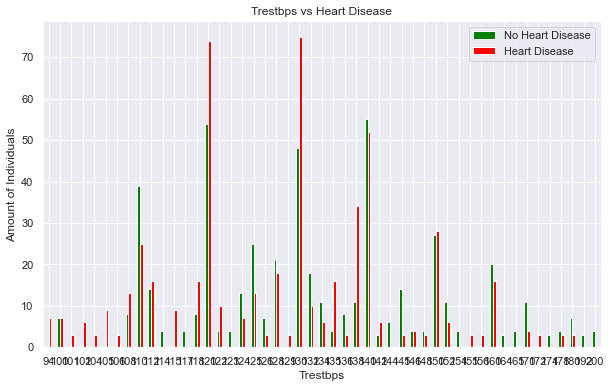

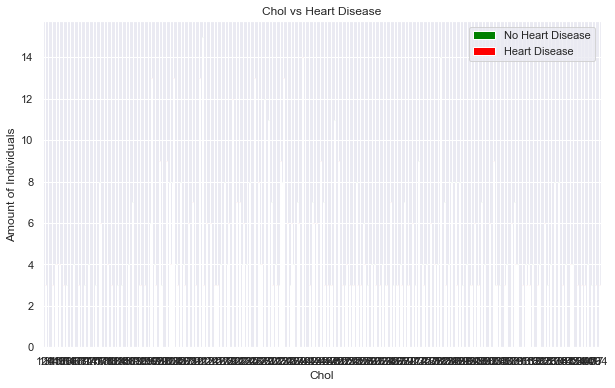

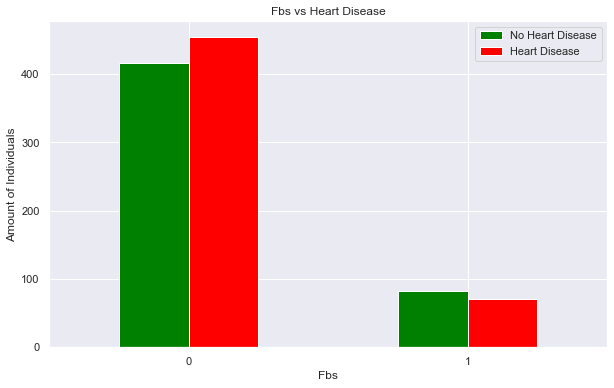

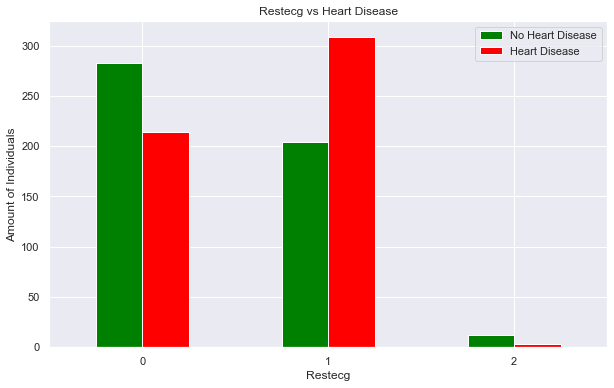

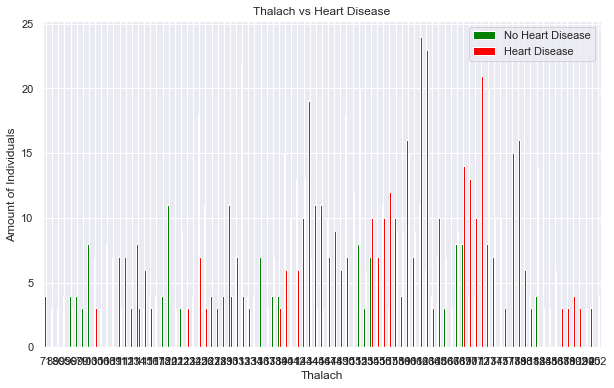

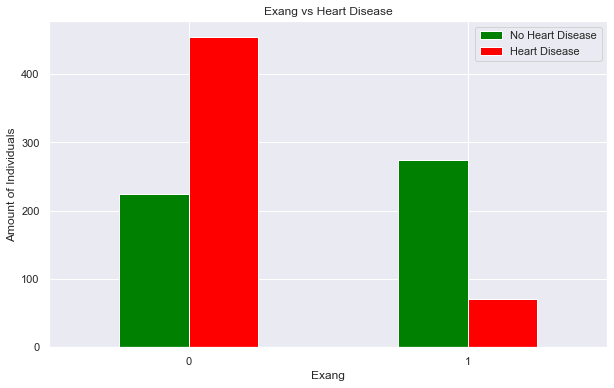

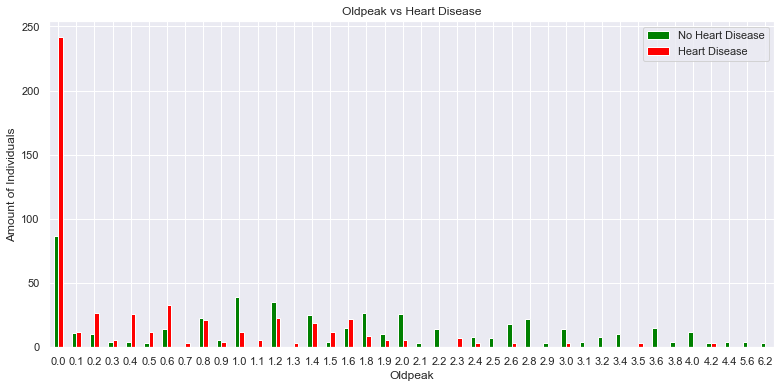

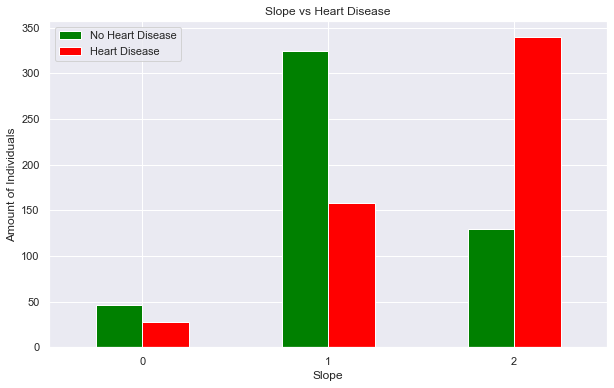

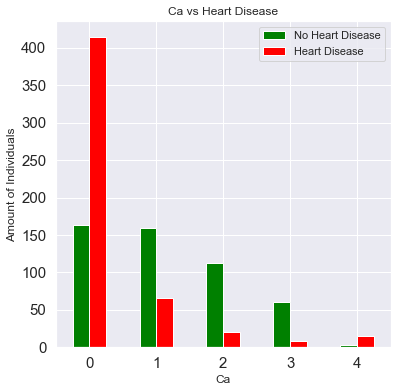

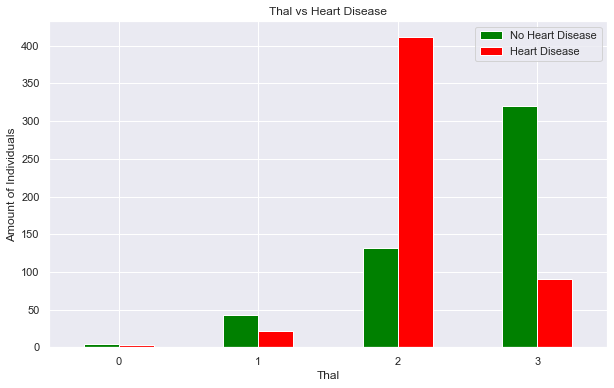

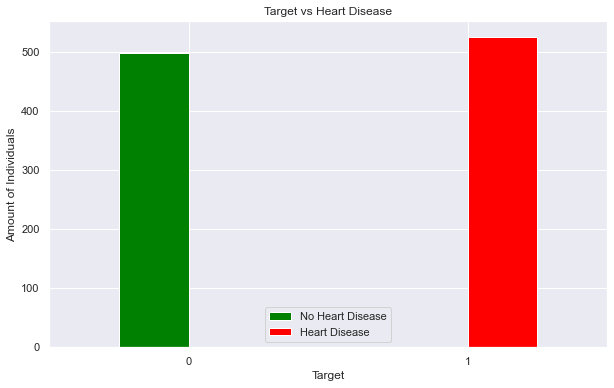

In [8]:
df = pd.read_csv("heart.csv")
value = df.cp

obs = 0

print(np.sum(df.target[df.cp==1]==1) + np.sum(df.target[df.cp==2]==1) +np.sum(df.target[df.cp==3]==1))
print(np.sum(df.target[df.cp==1]==0) + np.sum(df.target[df.cp==2]==0) +np.sum(df.target[df.cp==3]==0))
print(404/528)
for i in df.columns:
    
    
    if (i == "oldpeak"):
        
        q = pd.crosstab(df[i], df.target/len(df.target)).plot(kind="bar",figsize=(13,6),color=['green','red'])
    elif (i == "ca"):
        q = pd.crosstab(df[i], df.target).plot(kind="bar",figsize=(6,6),color=['green','red'], fontsize=15)
    elif (i == "cp"):
        q = pd.crosstab(df[i], df.target).plot(kind="bar",figsize=(6,6),color=['green','red'], fontsize=15)
    
    else:
        q = pd.crosstab(df[i], df.target).plot(kind="bar",figsize=(10,6),color=['green','red'])
    
       
    q.legend(["No Heart Disease", "Heart Disease"])
    q.set_title(f"{i.title()} vs Heart Disease")
    q.set_xlabel(f"{i.title()}")
    q.set_ylabel("Amount of Individuals")
    
   
    
    plt.xticks(rotation=0)
    if(i == 'age'):
        plt.savefig("age_vs_heart_disease")
    if(i == "oldpeak"):
        plt.savefig("oldpeak_vs_heart_disease")
    if(i == "ca"):
        plt.savefig("ca_vs_heart_disease")
    if(i == "cp"):
        plt.savefig("cp_vs_heart_disease")
            
    
    

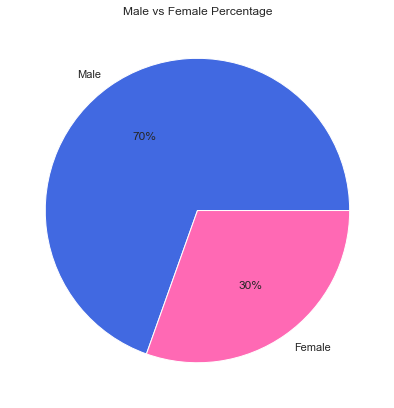

In [9]:

# sex
fig, ax = plt.subplots(figsize=a4_dims)
male = np.sum(df.sex == 1)
female= np.sum(df.sex == 0)
plt.pie([male, female], labels=["Male", "Female"], colors=["royalblue", "hotpink"], autopct='%.0f%%')
plt.title("Male vs Female Percentage")

plt.savefig("Gender_Distribution")

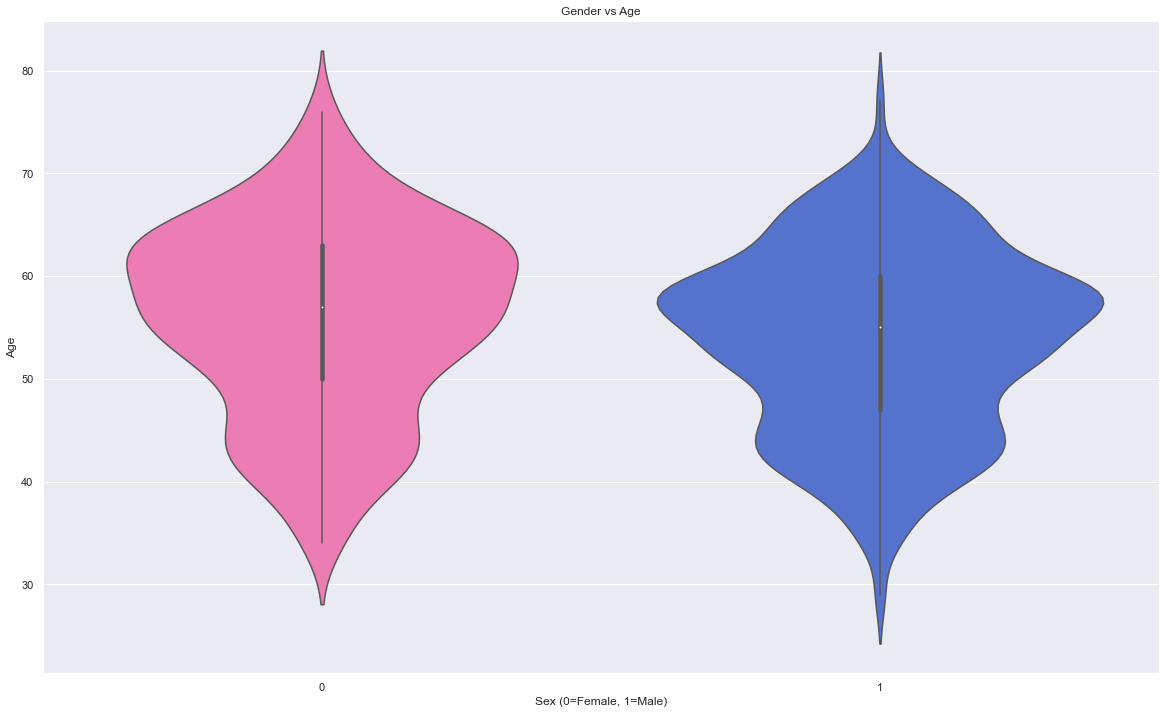

In [10]:

p=sns.violinplot(data=df, x="sex", y="age", split=True, palette=["hotpink","royalblue"] )
p.set(title="Gender vs Age",xlabel="Sex (0=Female, 1=Male)", ylabel="Age")
fig = p.get_figure()
fig.savefig("GENDER_AGE_VIOLIN")

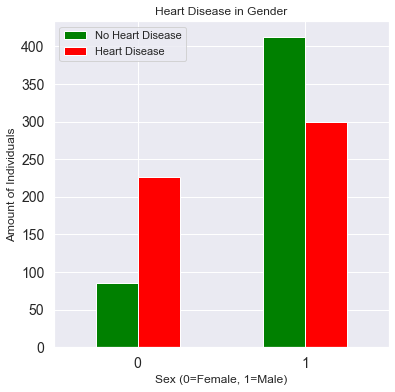

In [11]:

q = pd.crosstab(df.sex, df.target).plot(kind="bar",figsize=(6,6),color=['green','red'], fontsize=14)
q.legend(["No Heart Disease", "Heart Disease"])
q.set_title("Heart Disease in Gender")
q.set_xlabel("Sex (0=Female, 1=Male)")
q.set_ylabel("Amount of Individuals")
plt.xticks(rotation=0)

plt.savefig("GENDER_VS_HEARTDISEASE")



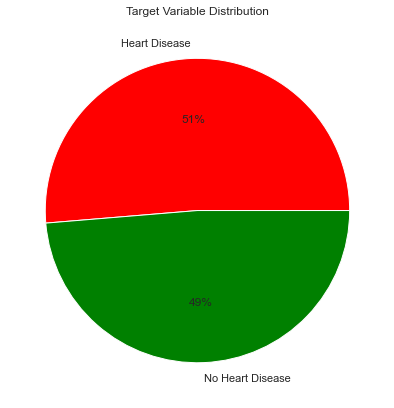

In [12]:

# target variable
fig, ax = plt.subplots(figsize=a4_dims)
has = np.sum(df.target == 1)
hasnt = np.sum(df.target == 0)
plt.pie([has, hasnt], labels=["Heart Disease", "No Heart Disease"], colors=["red", "green"], autopct='%.0f%%')
plt.title("Target Variable Distribution")

plt.savefig("HEART_DISEASE_DISTR")

0.8535742035742035
0.8675034867503487
0.9115646258503401
0.7745664739884393
(0.7745664739884393, 0.9115646258503401, 0.8374999999999999, None)


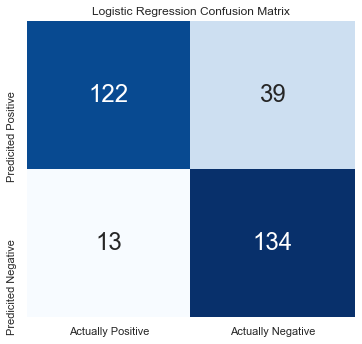

In [13]:
# logistic model without feature alteration
df = pd.read_csv("heart.csv")

df['cp'] = pd.Categorical(df.cp)
df['slope'] = pd.Categorical(df.slope)
df['thal'] = pd.Categorical(df.thal)

# making cp, slope and thal into dummy variables because they are categorical datas
df = pd.get_dummies(df, drop_first=False)

X = df.drop("target",1)
y=df.target

xtrain,xtest,ytrain,ytest = train_test_split(X,y, test_size=0.3, random_state=1)

scl = StandardScaler()
xtrain = scl.fit_transform(xtrain)
xtest = scl.transform(xtest)

log_model_na = LogisticRegression(penalty="l1", max_iter=10000,solver="liblinear", C=1/best_lamb)

cv_lr = cross_val_score(log_model_na, xtrain, ytrain, cv=5, scoring="accuracy")
print(cv_lr.mean())

log_model_na.fit(xtrain,ytrain)



print(log_model_na.score(xtrain,ytrain))

log_na_ypred = log_model_na.predict(xtest)

log_cm = confusion_matrix(ytest,log_na_ypred)

print(recall_score(ytest, log_na_ypred))
print(precision_score(ytest, log_na_ypred))

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
hm=sns.heatmap(log_cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24},  xticklabels=["Actually Positive", "Actually Negative"],yticklabels=["Predicited Positive", "Predicited Negative"])
hm.figure.savefig("LogReg_ConMatr")


print(precision_recall_fscore_support(ytest,log_na_ypred, average='binary'))

In [14]:
# # Load Data
# xtrain, xtest, ytrain, ytest, X,y,df = load_data()

# # Random Forest Model #
# #Define the classifier
# rf_model = RandomForestClassifier(n_estimators=100, # Number of trees to train
#                        criterion='gini', # How to train the trees. Also supports entropy.
#                        max_depth=6, # Max depth of the trees. Not necessary to change.
#                        min_samples_split=2, # Minimum samples to create a split.
#                        min_samples_leaf=1, # Minimum samples in a leaf. Accepts fractions for %. This is 0.1% of sample.
#                        min_weight_fraction_leaf=0.0, # Same as above, but uses the class weights.
#                        max_features='auto', # Maximum number of features per split (not tree!) by default is sqrt(vars)
#                        max_leaf_nodes=None, # Maximum number of nodes.
#                        min_impurity_decrease=0.0001, # Minimum impurity decrease. This is 10^-3.
#                        bootstrap=True, # If sample with repetition. For large samples (>100.000) set to false.
#                        oob_score=True,  # If report accuracy with non-selected cases.
#                        n_jobs=-1, # Parallel processing. Set to -1 for all cores. Watch your RAM!!
#                        random_state=rand_state, # Seed
#                        verbose=0, # If to give info during training. Set to 0 for silent training.
#                        warm_start=False, # If train over previously trained tree.
#                        class_weight='balanced'
#                                     )

In [15]:
# # Grid Search for hyperparameter tuning
# param_grid = dict({'n_estimators': [30,50, 100, 150],
#                    'max_depth': [4,5,6,7,8,9,10,None],
#                    'max_features': ["auto", "sqrt", "log2"],
#                  'criterion':['gini', 'entropy'],
#                 'min_samples_leaf':[0.001,0.01,0.1,1,10]
#                   })

# gs_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv= 5)
# gs_rf.fit(xtrain, ytrain)

# print(gs_rf.best_params_)

In [16]:
# set new hyperparameters
df = pd.read_csv("heart.csv")

df['cp'] = pd.Categorical(df.cp)
df['slope'] = pd.Categorical(df.slope)
df['thal'] = pd.Categorical(df.thal)

# making cp, slope and thal into dummy variables because they are categorical datas
df = pd.get_dummies(df, drop_first=False)

X = df.drop("target",1)
y=df.target

xtrain,xtest,ytrain,ytest = train_test_split(X,y, test_size=0.3, random_state=1)

scl = StandardScaler()
xtrain = scl.fit_transform(xtrain)
xtest = scl.transform(xtest)


rf_model = RandomForestClassifier(n_estimators=30, # Number of trees to train
                       criterion='entropy', # How to train the trees. Also supports entropy.
                       max_depth=None, # Max depth of the trees. Not necessary to change.
                       min_samples_split=2, # Minimum samples to create a split.
                       min_samples_leaf=0.001, # Minimum samples in a leaf. Accepts fractions for %. This is 0.1% of sample.
                       min_weight_fraction_leaf=0.0, # Same as above, but uses the class weights.
                       max_features='auto', # Maximum number of features per split (not tree!) by default is sqrt(vars)
                       max_leaf_nodes=None, # Maximum number of nodes.
                       min_impurity_decrease=0.0001, # Minimum impurity decrease. This is 10^-3.
                       bootstrap=True, # If sample with repetition. For large samples (>100.000) set to false.
                       oob_score=True,  # If report accuracy with non-selected cases.
                       n_jobs=-1, # Parallel processing. Set to -1 for all cores. Watch your RAM!!
                       random_state=rand_state, # Seed
                       verbose=0, # If to give info during training. Set to 0 for silent training.
                       warm_start=False, # If train over previously trained tree.
                       class_weight='balanced'
                                    )
# Train the RF.
rf_model.fit(xtrain, ytrain)

# Apply the model to the test set.
rf_ypred = rf_model.predict(xtest)
print(precision_recall_fscore_support(ytest,rf_ypred, average='binary'))
rf_probs_test = rf_model.predict_proba(xtest)

(0.9735099337748344, 1.0, 0.9865771812080537, None)


In [17]:
# Cross Validation for Random Forest
cv_rf = cross_val_score(rf_model, xtrain, ytrain, cv=5, scoring="accuracy")
print(cv_rf.mean())

print(accuracy_score(ytest, rf_ypred))
print(recall_score(ytest, rf_ypred))
print(precision_score(ytest, rf_ypred))

0.9735236985236986
0.987012987012987
1.0
0.9735099337748344


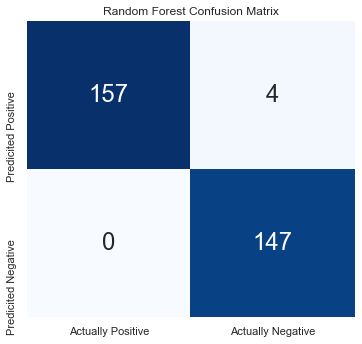

In [18]:
# Random Forest Confusion Matrix
rf_cm = confusion_matrix(ytest,rf_ypred)
plt.subplot(2,3,1)
plt.title("Random Forest Confusion Matrix")
hm =sns.heatmap(rf_cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24},  xticklabels=["Actually Positive", "Actually Negative"],yticklabels=["Predicited Positive", "Predicited Negative"])

hm.figure.savefig("RandForest_ConMatr")

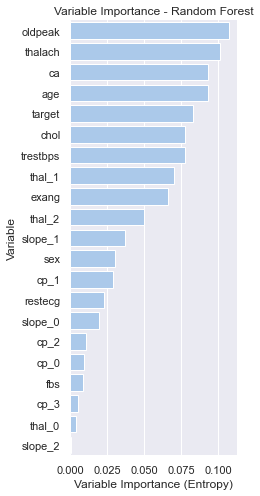

In [19]:
# Variable importance with Random Forest Model
# Importance is calculated by averaging the accuracy of trees when the variables are included in the tree
# and when they are not included
# Plot variable importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1] 

f, ax = plt.subplots(figsize=(3, 8))
plt.title("Variable Importance - Random Forest")
sns.set_color_codes("pastel")
a = sns.barplot(y=[df.columns[i] for i in indices], x=importances[indices], 
            label="Total", color="b")
ax.set(ylabel="Variable",
       xlabel="Variable Importance (Entropy)")
sns.despine(left=True, bottom=True)

a.figure.savefig("RF_VAR_IMPORTANCE")

0.8996212121212122
0.9090909090909091
0.9523809523809523
0.8695652173913043


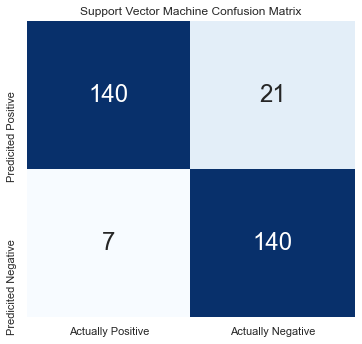

In [20]:
# support vector machine
from sklearn import svm

df = pd.read_csv("heart.csv")

df['cp'] = pd.Categorical(df.cp)
df['slope'] = pd.Categorical(df.slope)
df['thal'] = pd.Categorical(df.thal)

# making cp, slope and thal into dummy variables because they are categorical datas
df = pd.get_dummies(df, drop_first=False)

X = df.drop("target",1)
y=df.target

xtrain,xtest,ytrain,ytest = train_test_split(X,y, test_size=0.3, random_state=1)

scl = StandardScaler()
xtrain = scl.fit_transform(xtrain)
xtest = scl.transform(xtest)

clf = svm.SVC()
clf.fit(xtrain,ytrain)
clf_ypred = clf.predict(xtest)
clf_cvs = cross_val_score(clf, xtrain, ytrain, cv=5, scoring="accuracy")
print(clf_cvs.mean())

svm_cm = confusion_matrix(ytest,clf_ypred)
plt.subplot(2,3,1)
plt.title("Support Vector Machine Confusion Matrix")
hm=sns.heatmap(svm_cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24},  xticklabels=["Actually Positive", "Actually Negative"],yticklabels=["Predicited Positive", "Predicited Negative"])

hm.figure.savefig("SVM_ConMatr")
# ROC Curve for SVM

print(accuracy_score(ytest, clf_ypred))
print(recall_score(ytest, clf_ypred))
print(precision_score(ytest, clf_ypred))




0.8843240093240095
0.9188311688311688
0.9115646258503401
0.9178082191780822
(0.9178082191780822, 0.9115646258503401, 0.9146757679180887, None)


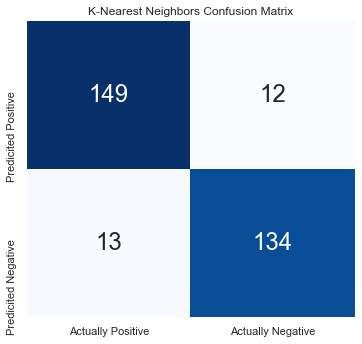

In [21]:
# k-nearest neighbor
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("heart.csv")

df['cp'] = pd.Categorical(df.cp)
df['slope'] = pd.Categorical(df.slope)
df['thal'] = pd.Categorical(df.thal)

# making cp, slope and thal into dummy variables because they are categorical datas
df = pd.get_dummies(df, drop_first=False)

X = df.drop("target",1)
y=df.target

xtrain,xtest,ytrain,ytest = train_test_split(X,y, test_size=0.3, random_state=1)

scl = StandardScaler()
xtrain = scl.fit_transform(xtrain)
xtest = scl.transform(xtest)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)
knn_ypred = knn.predict(xtest)
knn_cvs = cross_val_score(knn, xtrain, ytrain, cv=5, scoring="accuracy")
print(knn_cvs.mean())

knn_cm = confusion_matrix(ytest,knn_ypred)
plt.subplot(2,3,1)
plt.title("K-Nearest Neighbors Confusion Matrix")
hm = sns.heatmap(knn_cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24},  xticklabels=["Actually Positive", "Actually Negative"],yticklabels=["Predicited Positive", "Predicited Negative"])

hm.figure.savefig("KNN_ConMatr")

print(accuracy_score(ytest, knn_ypred))
print(recall_score(ytest, knn_ypred))
print(precision_score(ytest, knn_ypred))

print(precision_recall_fscore_support(ytest,knn_ypred, average='binary'))

In [22]:
# naive bayes


In [23]:
# class LinearModel(torch.nn.Module):
    
#     def __init__(self,num_features, num_classes):
        
#         super().__init__()
        
#         # Neural Network Architecture
#         self.dense1 = torch.nn.Linear(in_features=num_features, out_features=num_classes)
#         self.activation = torch.nn.Sigmoid()
    
#     def forward(self, X):
#         X = self.dense1(X)
#         X = self.activation(X)
#         return X

# g_loss_list = []
# g_accuracy_list = []
# g_valid_list = []

# # Load data into 'flattened' NumPy arrays
# df = pd.read_csv("heart.csv")

# df['cp'] = pd.Categorical(df.cp)
# df['slope'] = pd.Categorical(df.slope)
# df['thal'] = pd.Categorical(df.thal)

# # making cp, slope and thal into dummy variables because they are categorical datas
# df = pd.get_dummies(df, drop_first=False)

# X = df.drop("target",1)
# y=df.target.values

# xtrain,xtest,ytrain,ytest = train_test_split(X,y, test_size=0.3, random_state=1)

# scl = StandardScaler()
# xtrain = scl.fit_transform(xtrain)
# xtest = scl.transform(xtest)

# num_features = 21
# num_classes = 1
# max_iter = 90

# learning_rates = [1e-2,1e-3,1e-4,1e-5]

# for lr in learning_rates:
    
#     loss_list = []
#     accuracy_list = []
#     valid_list = []
    
#     model_control = LinearModel(num_features,num_classes)
#     optimizer = torch.optim.SGD(model_control.parameters(), lr=lr)
#     criterion = torch.nn.BCELoss()
    
    
    
#     for i in range(max_iter):
        
#         epoch_loss = 0
        
#         correct_preds = 0
        
#         for index, xtr in enumerate(xtrain):

#             xtr = torch.Tensor(xtr)
#             ytrain = torch.Tensor(ytrain)

#             optimizer.zero_grad()
#             y_pred = model_control(xtr)

#             ytru = ytrain[index].view(1)

#             loss = criterion(input=y_pred, target=ytru)
#             loss.backward()
#             optimizer.step()
#             epoch_loss += loss.item()
    
#             correct_preds += y_pred.detach().numpy().round() == ytru.detach().numpy()      
       
#         else:       
#             with torch.no_grad():

#                 correct_val_preds = 0

#                 # validation accuracy
#                 for index, xte in enumerate(xtest):

#                     xte = torch.Tensor(xte)
#                     y_pred_val = model_control(xte)
                
#                     ytest = torch.Tensor(ytest)
#                     ytru = ytest[index].view(1)

#                     val_loss = criterion(input=y_pred_val, target=ytru)
                   
#                     correct_val_preds += y_pred_val.detach().numpy().round() == ytru.detach().numpy()   
                
#                 # loss
#                 loss_list.append(epoch_loss/len(xtrain)) 
                
#                 # training acc
#                 training_acc = correct_preds/len(xtrain)
#                 accuracy_list.append(training_acc)

#                 # Validation Accuracy
            
#                 val_acc = correct_val_preds/len(xtest)
#                 valid_list.append(val_acc)      
   
#     # add control model performance
#     g_loss_list.append(loss_list)
#     g_accuracy_list.append(accuracy_list)
#     g_valid_list.append(valid_list)
    

# for i in range(len(learning_rates)):
# #     clear_output(wait=True)
#     fig, ax1 = plt.subplots(figsize=(7,5))
#     plt.title(f"Linear Model Evaluation w/ Learning Rate = {learning_rates[i]}")
#     ax1.plot(g_loss_list[i], label='Training Loss', color='red')
#     ax1.legend(loc='lower left')
#     ax1.set_ylabel('Binary Cross Entropy Loss')
#     ax2 = ax1.twinx()
#     ax2.plot(g_accuracy_list[i], label='Training Accuracy', color='green')
#     ax2.set_ylabel('Accuracy (%)')
#     ax2.set_xlabel('Epoch')
#     ax2.plot(g_valid_list[i], label='Validation Accuracy', color='blue')
#     ax2.legend(loc='lower right')
    
#     plt.savefig(f"LNN_LR_{int(learning_rates[i]*10000)}-DIVBY10000.png")

In [24]:
# class LinearModel(torch.nn.Module):
    
#     def __init__(self,num_features, num_classes):
        
#         super().__init__()
        
#         # Neural Network Architecture
#         self.dense1 = torch.nn.Linear(in_features=num_features, out_features=num_classes)
#         self.activation = torch.nn.Sigmoid()
    
#     def forward(self, X):
#         X = self.dense1(X)
#         X = self.activation(X)
#         return X

# df = pd.read_csv("heart.csv")

# df['cp'] = pd.Categorical(df.cp)
# df['slope'] = pd.Categorical(df.slope)
# df['thal'] = pd.Categorical(df.thal)

# # making cp, slope and thal into dummy variables because they are categorical datas
# df = pd.get_dummies(df, drop_first=False)

# X = df.drop("target",1)
# y=df.target

# xtrain,xtest,ytrain,ytest = train_test_split(X,y, test_size=0.3, random_state=1)

# scl = StandardScaler()
# xtrain = scl.fit_transform(xtrain)
# xtest = scl.transform(xtest)

# num_features = 21
# num_classes = 1
# max_iter = 90
    
# loss_list = []
# tr_acc =[]
# vl_acc =[]
# valid_list = []
# model_control = LinearModel(num_features,num_classes)
# optimizer = torch.optim.SGD(model_control.parameters(), lr=0.0001)
# criterion = torch.nn.BCELoss()



# for i in range(max_iter):

#     train_loss = 0
#     val_loss = 0
#     correct_preds = 0
#     correct_val_preds = 0

#     for index, xtr in enumerate(xtrain):

#         xtr = torch.Tensor(xtr)
#         ytrain = torch.Tensor(ytrain)

#         optimizer.zero_grad()
#         y_pred = model_control(xtr)

#         ytru = ytrain[index].view(1)

#         loss = criterion(input=y_pred, target=ytru)
#         loss.backward()
#         optimizer.step()
#         train_loss += loss.item()

#         correct_preds += y_pred.detach().numpy().round() == ytru.detach().numpy()      

#     else:       
#         with torch.no_grad():

#             correct_val_preds = 0
#             val_loss_item = 0

#             # validation accuracy
#             for index, xte in enumerate(xtest):

#                 xte = torch.Tensor(xte)
#                 ytest_val = torch.Tensor(ytest.to_numpy())
#                 ytru_val = ytest_val[index].view(1)
                
#                 y_pred_val = model_control(xte)
                
#                 val_loss = criterion(input=y_pred_val, target=ytru_val)
                
#                 val_loss_item += val_loss.item()

#                 correct_val_preds += y_pred_val.detach().numpy().round() == ytru_val.detach().numpy()

#              # validation accuracy
#             val_acc = correct_val_preds/len(xtest)
#             vl_acc.append(val_acc)
        
#             # validation error
#             val_error = val_loss_item / len(xtest)
#             valid_list.append(val_error)      
              
#             # training accuracy
#             train_acc = correct_preds/len(xtrain)
#             tr_acc.append(train_acc)

#             # training error
#             training_error = train_loss / len(xtrain)
#             loss_list.append(training_error)




# fig, ax1 = plt.subplots(figsize=(7,5))
# plt.title(f"Linear Model Evaluation w/ Learning Rate = 0.0001")
# ax1.plot(loss_list, label='Training Error', color='green')
# ax1.plot(valid_list, label="Validation Error", color="blue")
# ax1.legend(loc='lower left')
# ax1.set_xlabel('Epoch #')
# ax1.set_ylabel('Binary Cross Entropy Loss')
# plt.savefig("LMODELEVAL_LOSS")
# fig2, ax2 = plt.subplots(figsize=(7,5))
# plt.title(f"Linear Model Evaluation w/ Learning Rate = 0.0001")
# ax2.plot(tr_acc, label='Training Accuracy', color='green')
# ax2.plot(vl_acc, label="Validation Accuracy", color="blue")
# ax2.legend(loc='lower left')
# ax2.set_xlabel('Epoch #')
# ax2.set_ylabel('Accuracy (%)')
# plt.savefig("LMODELEVAL_ACC")


In [25]:
class NonLinearModel(torch.nn.Module):
    
    def __init__(self,num_features, num_classes):
        
        super().__init__()
 
        # Neural Network Architecture
        self.dense1 = torch.nn.Linear(in_features=num_features, out_features=14)
        self.activation1 = torch.nn.Tanh()
        self.dense2 = torch.nn.Linear(in_features=14, out_features=1)
        self.activation2 = torch.nn.Sigmoid()
        
        
    def forward(self, X):
        X = self.dense1(X)
        X = self.activation1(X)
        X = self.dense2(X)
        X = self.activation2(X)
       
        return X

In [26]:
# # finding best learning rate for non-linear model

# g_loss_list = []
# g_val_loss_list = []
# g_accuracy_list = []
# g_valid_list = []

# # Load data into 'flattened' NumPy arrays
# df = pd.read_csv("heart.csv")

# df['cp'] = pd.Categorical(df.cp)
# df['slope'] = pd.Categorical(df.slope)
# df['thal'] = pd.Categorical(df.thal)

# # making cp, slope and thal into dummy variables because they are categorical datas
# df = pd.get_dummies(df, drop_first=False)

# X = df.drop("target",1)
# y=df.target.values

# xtrain,xtest,ytrain,ytest = train_test_split(X,y, test_size=0.3, random_state=1)

# scl = StandardScaler()
# xtrain = scl.fit_transform(xtrain)
# xtest = scl.transform(xtest)

# num_features = 21
# num_classes = 1
# max_iter = 75

# learning_rates = [1e-1,1e-2,1e-3,1e-4,1e-5, 1e-6]
# for lr in learning_rates:
    
#     loss_list = []
#     accuracy_list = []
#     valid_list = []
#     val_loss_list=[]
#     model_control = NonLinearModel(num_features,num_classes)
#     optimizer = torch.optim.SGD(model_control.parameters(), lr=lr)
#     criterion = torch.nn.BCELoss()
    
    
    
#     for i in range(max_iter):
        
#         epoch_loss = 0
        
#         correct_preds = 0
        
#         for index, xtr in enumerate(xtrain):

#             xtr = torch.Tensor(xtr)
#             ytrain = torch.Tensor(ytrain)

#             optimizer.zero_grad()
#             y_pred = model_control(xtr)

#             ytru = ytrain[index].view(1)

#             loss = criterion(input=y_pred, target=ytru)
#             loss.backward()
#             optimizer.step()
#             epoch_loss += loss.item()
    
#             correct_preds += y_pred.detach().numpy().round() == ytru.detach().numpy()      
       
#         else:       
#             with torch.no_grad():

#                 correct_val_preds = 0
#                 val_loss_item = 0
#                 # validation accuracy
#                 for index, xte in enumerate(xtest):

#                     xte = torch.Tensor(xte)
#                     y_pred_val = model_control(xte)
                    
#                     ytest = torch.Tensor(ytest)
#                     ytru = ytest[index].view(1)

#                     val_loss = criterion(input=y_pred_val, target=ytru)
                    
#                     val_loss_item += val_loss.item()
#                     correct_val_preds += y_pred_val.detach().numpy().round() == ytru.detach().numpy()   
                
#                 # loss
#                 loss_list.append(epoch_loss/len(xtrain)) 
                
#                 # training acc
#                 training_acc = correct_preds/len(xtrain)
#                 accuracy_list.append(training_acc)

#                 # Validation Accuracy
#                 val_loss_list.append(val_loss_item/len(xtest))
#                 val_acc = correct_val_preds/len(xtest)
#                 valid_list.append(val_acc)      
   
#     # add control model performance
#     g_loss_list.append(loss_list)
#     g_accuracy_list.append(accuracy_list)
#     g_valid_list.append(valid_list)
#     g_val_loss_list.append(val_loss_list)
    
# for i in range(len(learning_rates)):
# #     clear_output(wait=True)
#     fig, ax1 = plt.subplots(figsize=(7,5))
#     plt.title(f"Nonlinear Model Evaluation w/ Learning Rate = {learning_rates[i]}")
#     ax1.plot(g_loss_list[i], label='Training Loss (Dotted)', color='green', linestyle="--")
#     ax1.plot(g_val_loss_list[i], label='Validation Loss (Dotted)', color='blue', linestyle="--")
    
#     ax1.legend(loc='lower left')
#     ax1.set_ylabel('Binary Cross Entropy Loss')
#     ax2 = ax1.twinx()
#     ax2.plot(g_accuracy_list[i], label='Training Accuracy', color='green')
#     ax2.set_ylabel('Accuracy (%)')
    
#     ax2.plot(g_valid_list[i], label='Validation Accuracy', color='blue')
#     ax2.legend(loc='lower right')
#     ax2.set_xlabel('Epoch #')
#     plt.savefig(f"NLNN_LR_{int(learning_rates[i]*10000)}-DIVBY10000.png")

(0.7697368421052632, 0.7959183673469388, 0.782608695652174, None)


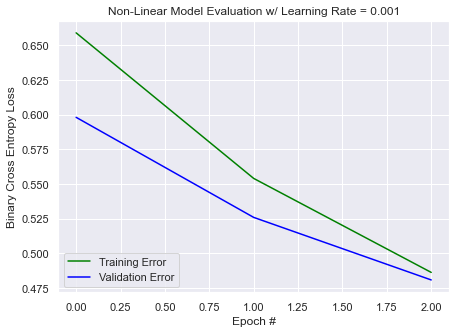

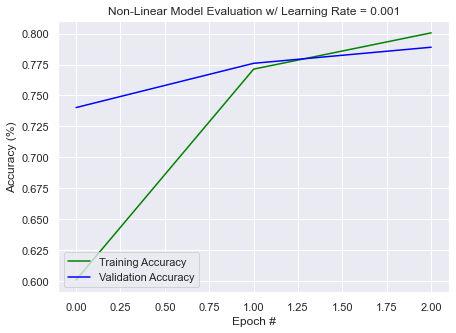

In [36]:
# Load data into 'flattened' NumPy arrays
df = pd.read_csv("heart.csv")

df['cp'] = pd.Categorical(df.cp)
df['slope'] = pd.Categorical(df.slope)
df['thal'] = pd.Categorical(df.thal)

# making cp, slope and thal into dummy variables because they are categorical datas
df = pd.get_dummies(df, drop_first=False)

X = df.drop("target",1)
y= df.target.values

xtrain,xtest,ytrain,ytest = train_test_split(X,y, test_size=0.3, random_state=1)

scl = StandardScaler()
xtrain = scl.fit_transform(xtrain)
xtest = scl.transform(xtest)

num_features = 21
num_classes = 1
max_iter = 3

loss_list = []
tr_acc =[]
vl_acc =[]
valid_list = []

model_control = NonLinearModel(num_features,num_classes)
optimizer = torch.optim.SGD(model_control.parameters(), lr=0.001)
criterion = torch.nn.BCELoss()

prec_recall_list = []

for i in range(max_iter):


    train_loss = 0
    val_loss = 0
    correct_preds = 0
    correct_val_preds = 0
    
    for index, xtr in enumerate(xtrain):

        xtr = torch.Tensor(xtr)
        ytrain = torch.Tensor(ytrain)

        optimizer.zero_grad()
        y_pred = model_control(xtr)

        ytru = ytrain[index].view(1)

        loss = criterion(input=y_pred, target=ytru)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        correct_preds += y_pred.detach().numpy().round() == ytru.detach().numpy()      

    else:       
        with torch.no_grad():

            correct_val_preds = 0
            val_loss_item = 0
            val_tru_list = []
            val_pred_list = []
            # validation accuracy            
            for index, xte in enumerate(xtest):

                xte = torch.Tensor(xte)
                y_pred_val = model_control(xte)
                
                
                ytest = torch.Tensor(ytest)
                ytru = ytest[index].view(1)
                
                val_loss = criterion(input=y_pred_val, target=ytru)
                
                val_loss_item += val_loss.item()

                correct_val_preds += y_pred_val.detach().numpy().round() == ytru.detach().numpy()
                val_pred_list.append(y_pred_val.detach().numpy().round())
                val_tru_list.append(ytru.detach().numpy())
            
            
            prec_recall_list.append(precision_recall_fscore_support(val_tru_list,val_pred_list, average='binary'))
            # validation accuracy
            val_acc = correct_val_preds/len(xtest)
            vl_acc.append(val_acc)
        
            # validation error
            val_error = val_loss_item / len(xtest)
            valid_list.append(val_error)      
              
        # training accuracy
        train_acc = correct_preds/len(xtrain)
        tr_acc.append(train_acc)

        # training error
        training_error = train_loss / len(xtrain)
        loss_list.append(training_error)
        
        
        
max_fscore = -1
inxes = ""
for l,i in enumerate(prec_recall_list):
    if (i[2] > max_fscore):
        max_fscore = i[2]
        inxes = l
    
print(prec_recall_list[inxes])

            
            
fig, ax1 = plt.subplots(figsize=(7,5))
plt.title(f"Non-Linear Model Evaluation w/ Learning Rate = 0.001")
ax1.plot(loss_list, label='Training Error', color='green')
ax1.plot(valid_list, label="Validation Error", color="blue")
ax1.legend(loc='lower left')
ax1.set_xlabel('Epoch #')
ax1.set_ylabel('Binary Cross Entropy Loss')
plt.savefig("NLMODELEVAL_LOSS")
fig2, ax2 = plt.subplots(figsize=(7,5))
plt.title(f"Non-Linear Model Evaluation w/ Learning Rate = 0.001")
ax2.plot(tr_acc, label='Training Accuracy', color='green')
ax2.plot(vl_acc, label="Validation Accuracy", color="blue")
ax2.legend(loc='lower left')
ax2.set_xlabel('Epoch #')
ax2.set_ylabel('Accuracy (%)')
plt.savefig("NLMODELEVAL_ACC")
# (0.8012048192771084, 0.9047619047619048, 0.8498402555910542, None)
# (0.7771428571428571, 0.9251700680272109, 0.84472049689441, None)

In [28]:
# model = LogisticRegression(max_iter =10000)


# df = pd.read_csv("heart.csv")

# df['cp'] = pd.Categorical(df.cp)
# df['slope'] = pd.Categorical(df.slope)
# df['thal'] = pd.Categorical(df.thal)

# # making cp, slope and thal into dummy variables because they are categorical datas
# df = pd.get_dummies(df, drop_first=False)

# X = df.drop("target",1)
# y= df.target.values

# xtrain,xtest,ytrain,ytest = train_test_split(X,y, test_size=0.3, random_state=1)


# model.fit(xtrain,ytrain)

# ypred = model.predict(xtest)

# ypred_prob = model.predict_proba(xtest)


# fig, ax = plt.subplots(dpi=120)
# fpr, tpr, _ = roc_curve(ytest, ypred_prob[:,1]) 
# ax=sns.lineplot(fpr,tpr)
# ax.set_title("ROC Curve")
# ax.set_xlabel('False positive rate', fontsize = 16)
# ax.set_ylabel('True positive rate', fontsize = 16)
# print("The area under the ROC curve is ", auc(fpr,tpr))

In [29]:
# # if i want the probability of a positive test to be more than 85%, conditioned on truly being positive.

# specificity = 1-np.min(fpr[tpr>0.85])
# print(f"The specificity is", np.round(specificity,4))

# N = np.sum(ytest==0)
# stderr = np.sqrt(specificity*(1-specificity)/N)
# ci = [specificity - 1.9*np.std(stderr),specificity + 1.90*np.std(stderr) ]
# print(f"Norm ci:", ci)

In [30]:
# for i in df.columns:
#     noise = np.std(df[i])/np.sqrt(df[i].size)
#     print(noise)